## Breakout Screener

In [4]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import numpy as np
import math
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
     

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_23310/1787403743.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


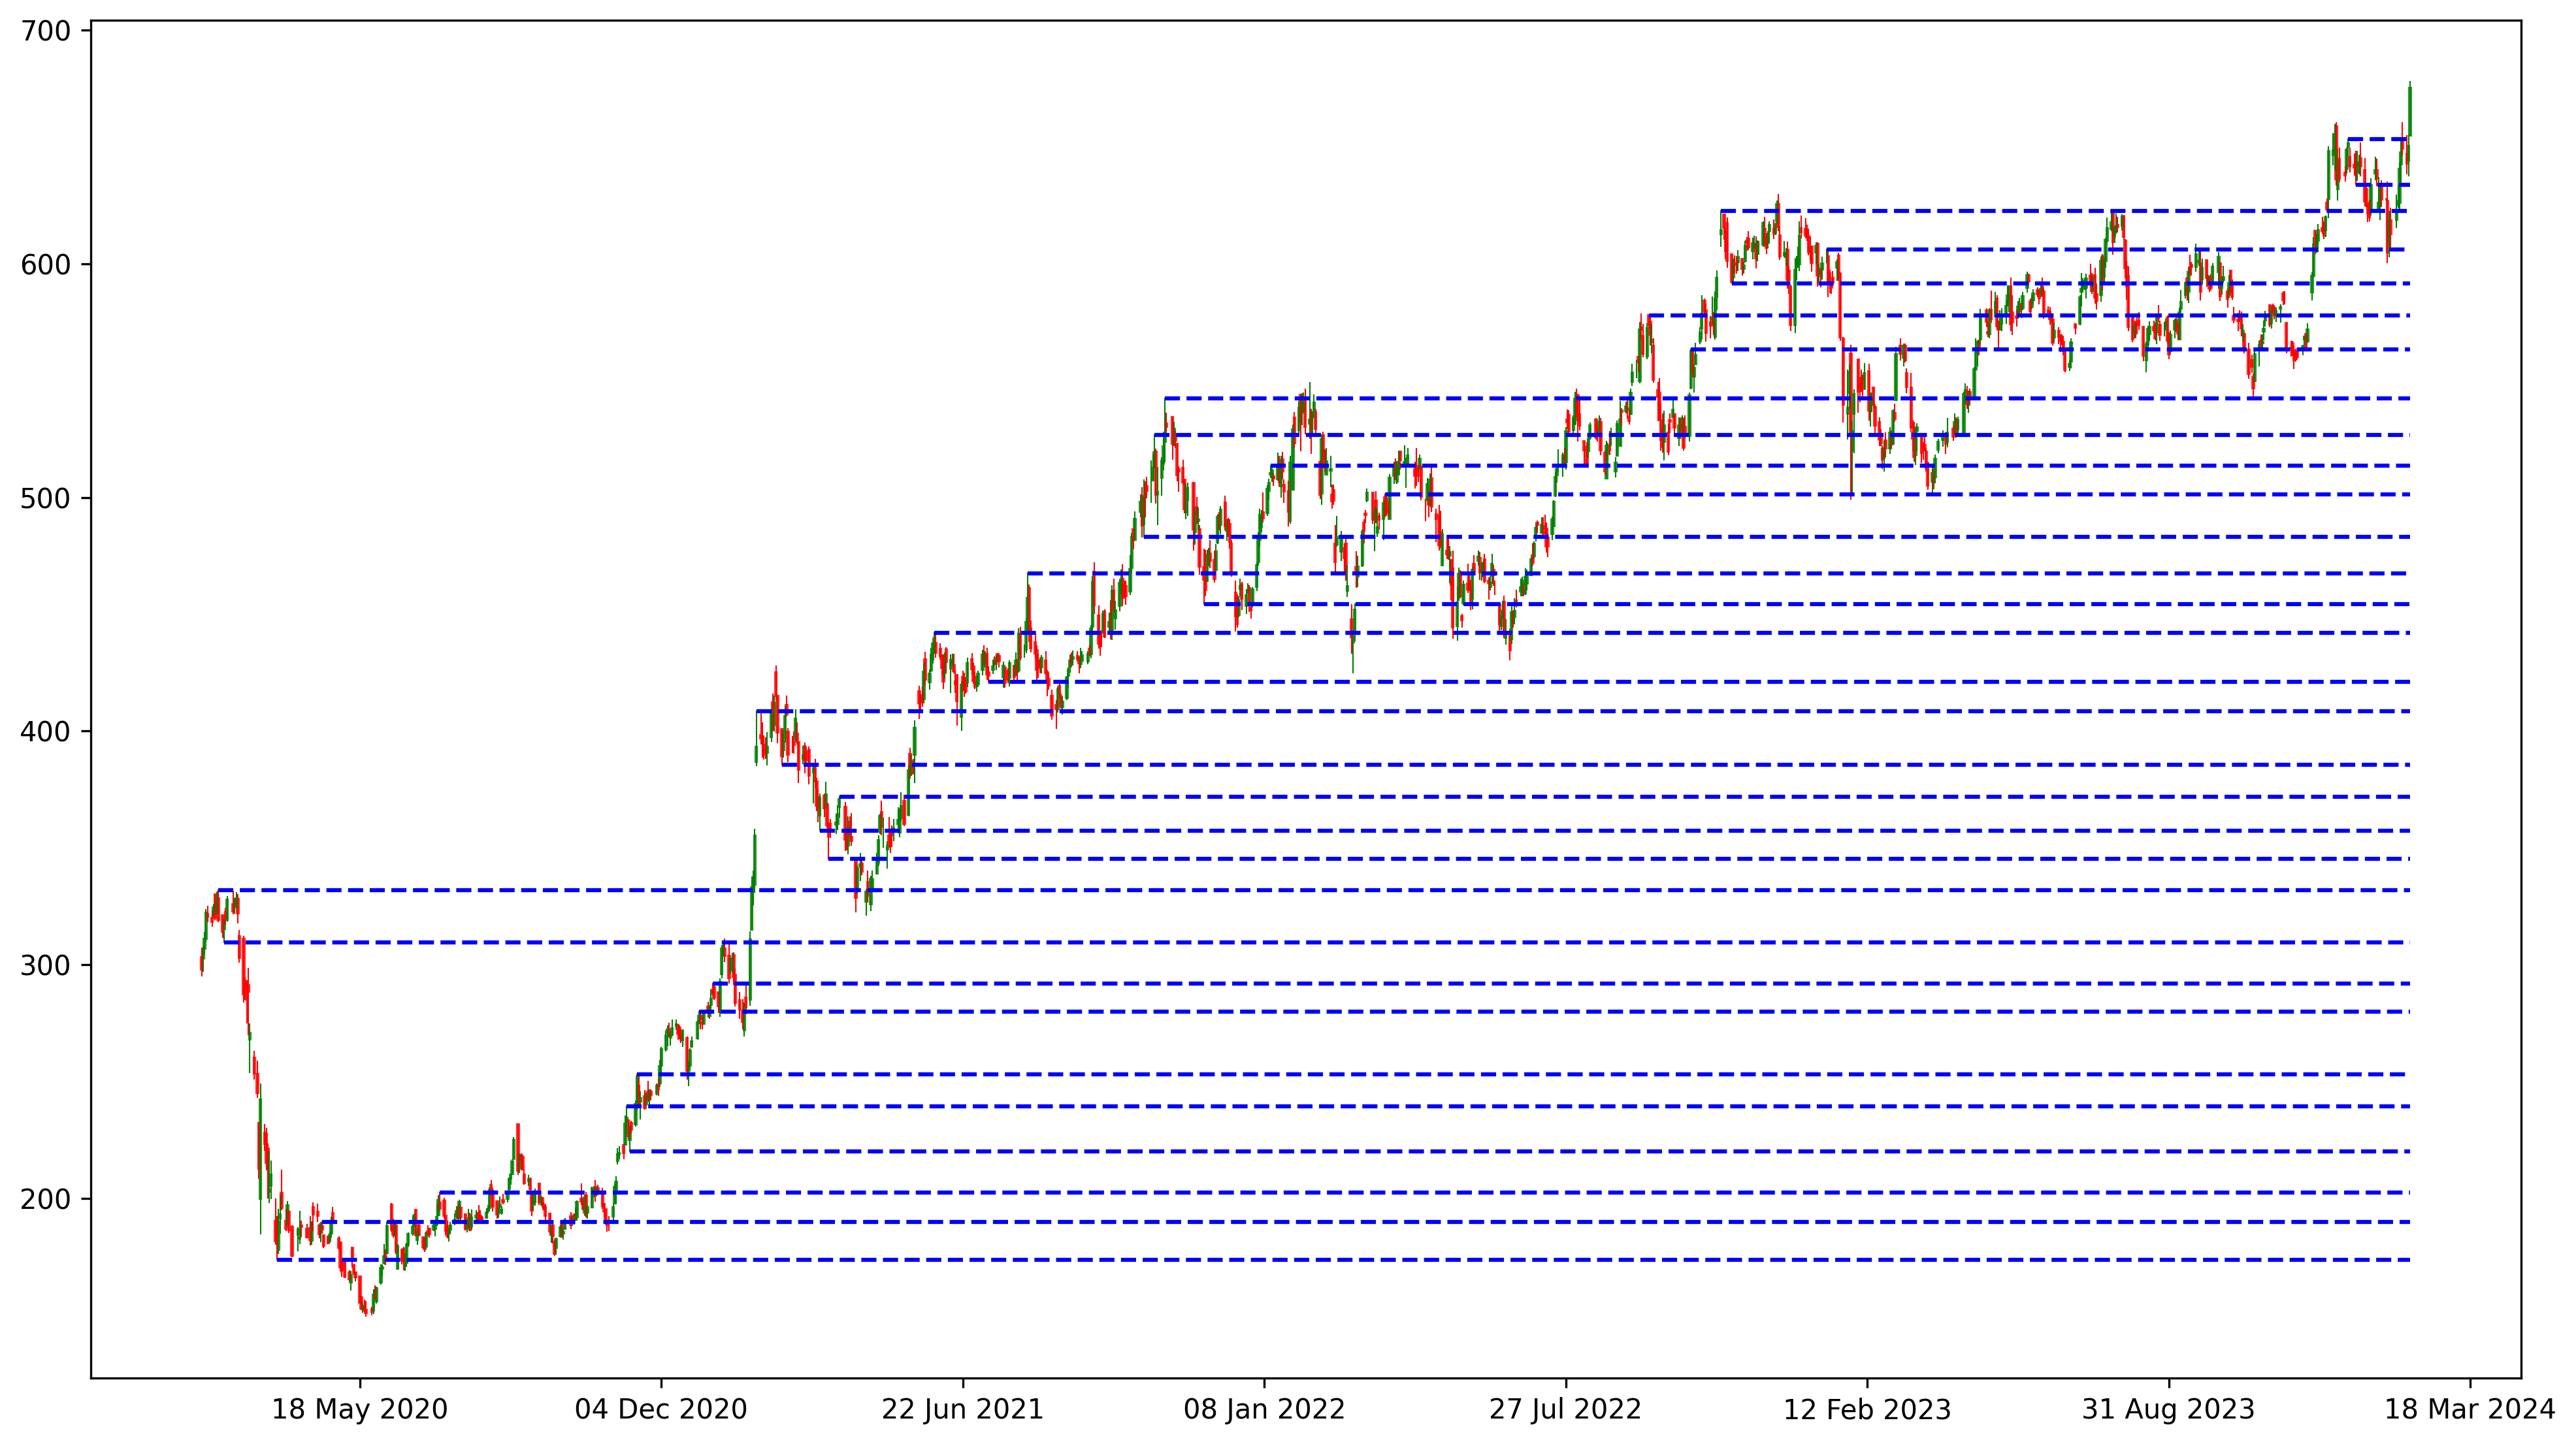

In [5]:
# method 1: fractal candlestick pattern

def get_stock_price(symbol):
  df = yf.download(symbol, start='2020-02-01', threads= False)
  df['Date'] = pd.to_datetime(df.index)
  df['Date'] = df['Date'].apply(mpl_dates.date2num)
  df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
  return df

def is_support(df,i):
  cond1 = df['Low'][i] < df['Low'][i-1] 
  cond2 = df['Low'][i] < df['Low'][i+1] 
  cond3 = df['Low'][i+1] < df['Low'][i+2] 
  cond4 = df['Low'][i-1] < df['Low'][i-2]
  return (cond1 and cond2 and cond3 and cond4)

def is_resistance(df,i):
  cond1 = df['High'][i] > df['High'][i-1] 
  cond2 = df['High'][i] > df['High'][i+1] 
  cond3 = df['High'][i+1] > df['High'][i+2] 
  cond4 = df['High'][i-1] > df['High'][i-2]
  return (cond1 and cond2 and cond3 and cond4)

def is_far_from_level(value, levels, df):
    ave =  np.mean(df['High'] - df['Low'])
    return np.sum([abs(value - level) < ave for _, level in levels]) == 0

def plot_all(levels, df):
    fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
    candlestick_ohlc(ax,df.values,width=0.6, colorup='green', colordown='red', alpha=0.8)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    for level in levels:
        plt.hlines(level[1], xmin=df['Date'][level[0]], xmax=max(df['Date']), colors='blue', linestyle='--')
    fig.show()

stock_code = 'SBIN.NS'
df = get_stock_price(stock_code)
levels = []
for i in range(2,len(df)-2):
  if is_support(df,i):
    l = df['Low'][i]
    if is_far_from_level(l, levels, df):
      levels.append((i,l))
  elif is_resistance(df,i):
    l = df['High'][i]
    if is_far_from_level(l, levels, df):
      levels.append((i,l))

plot_all(levels, df)

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_23310/1787403743.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


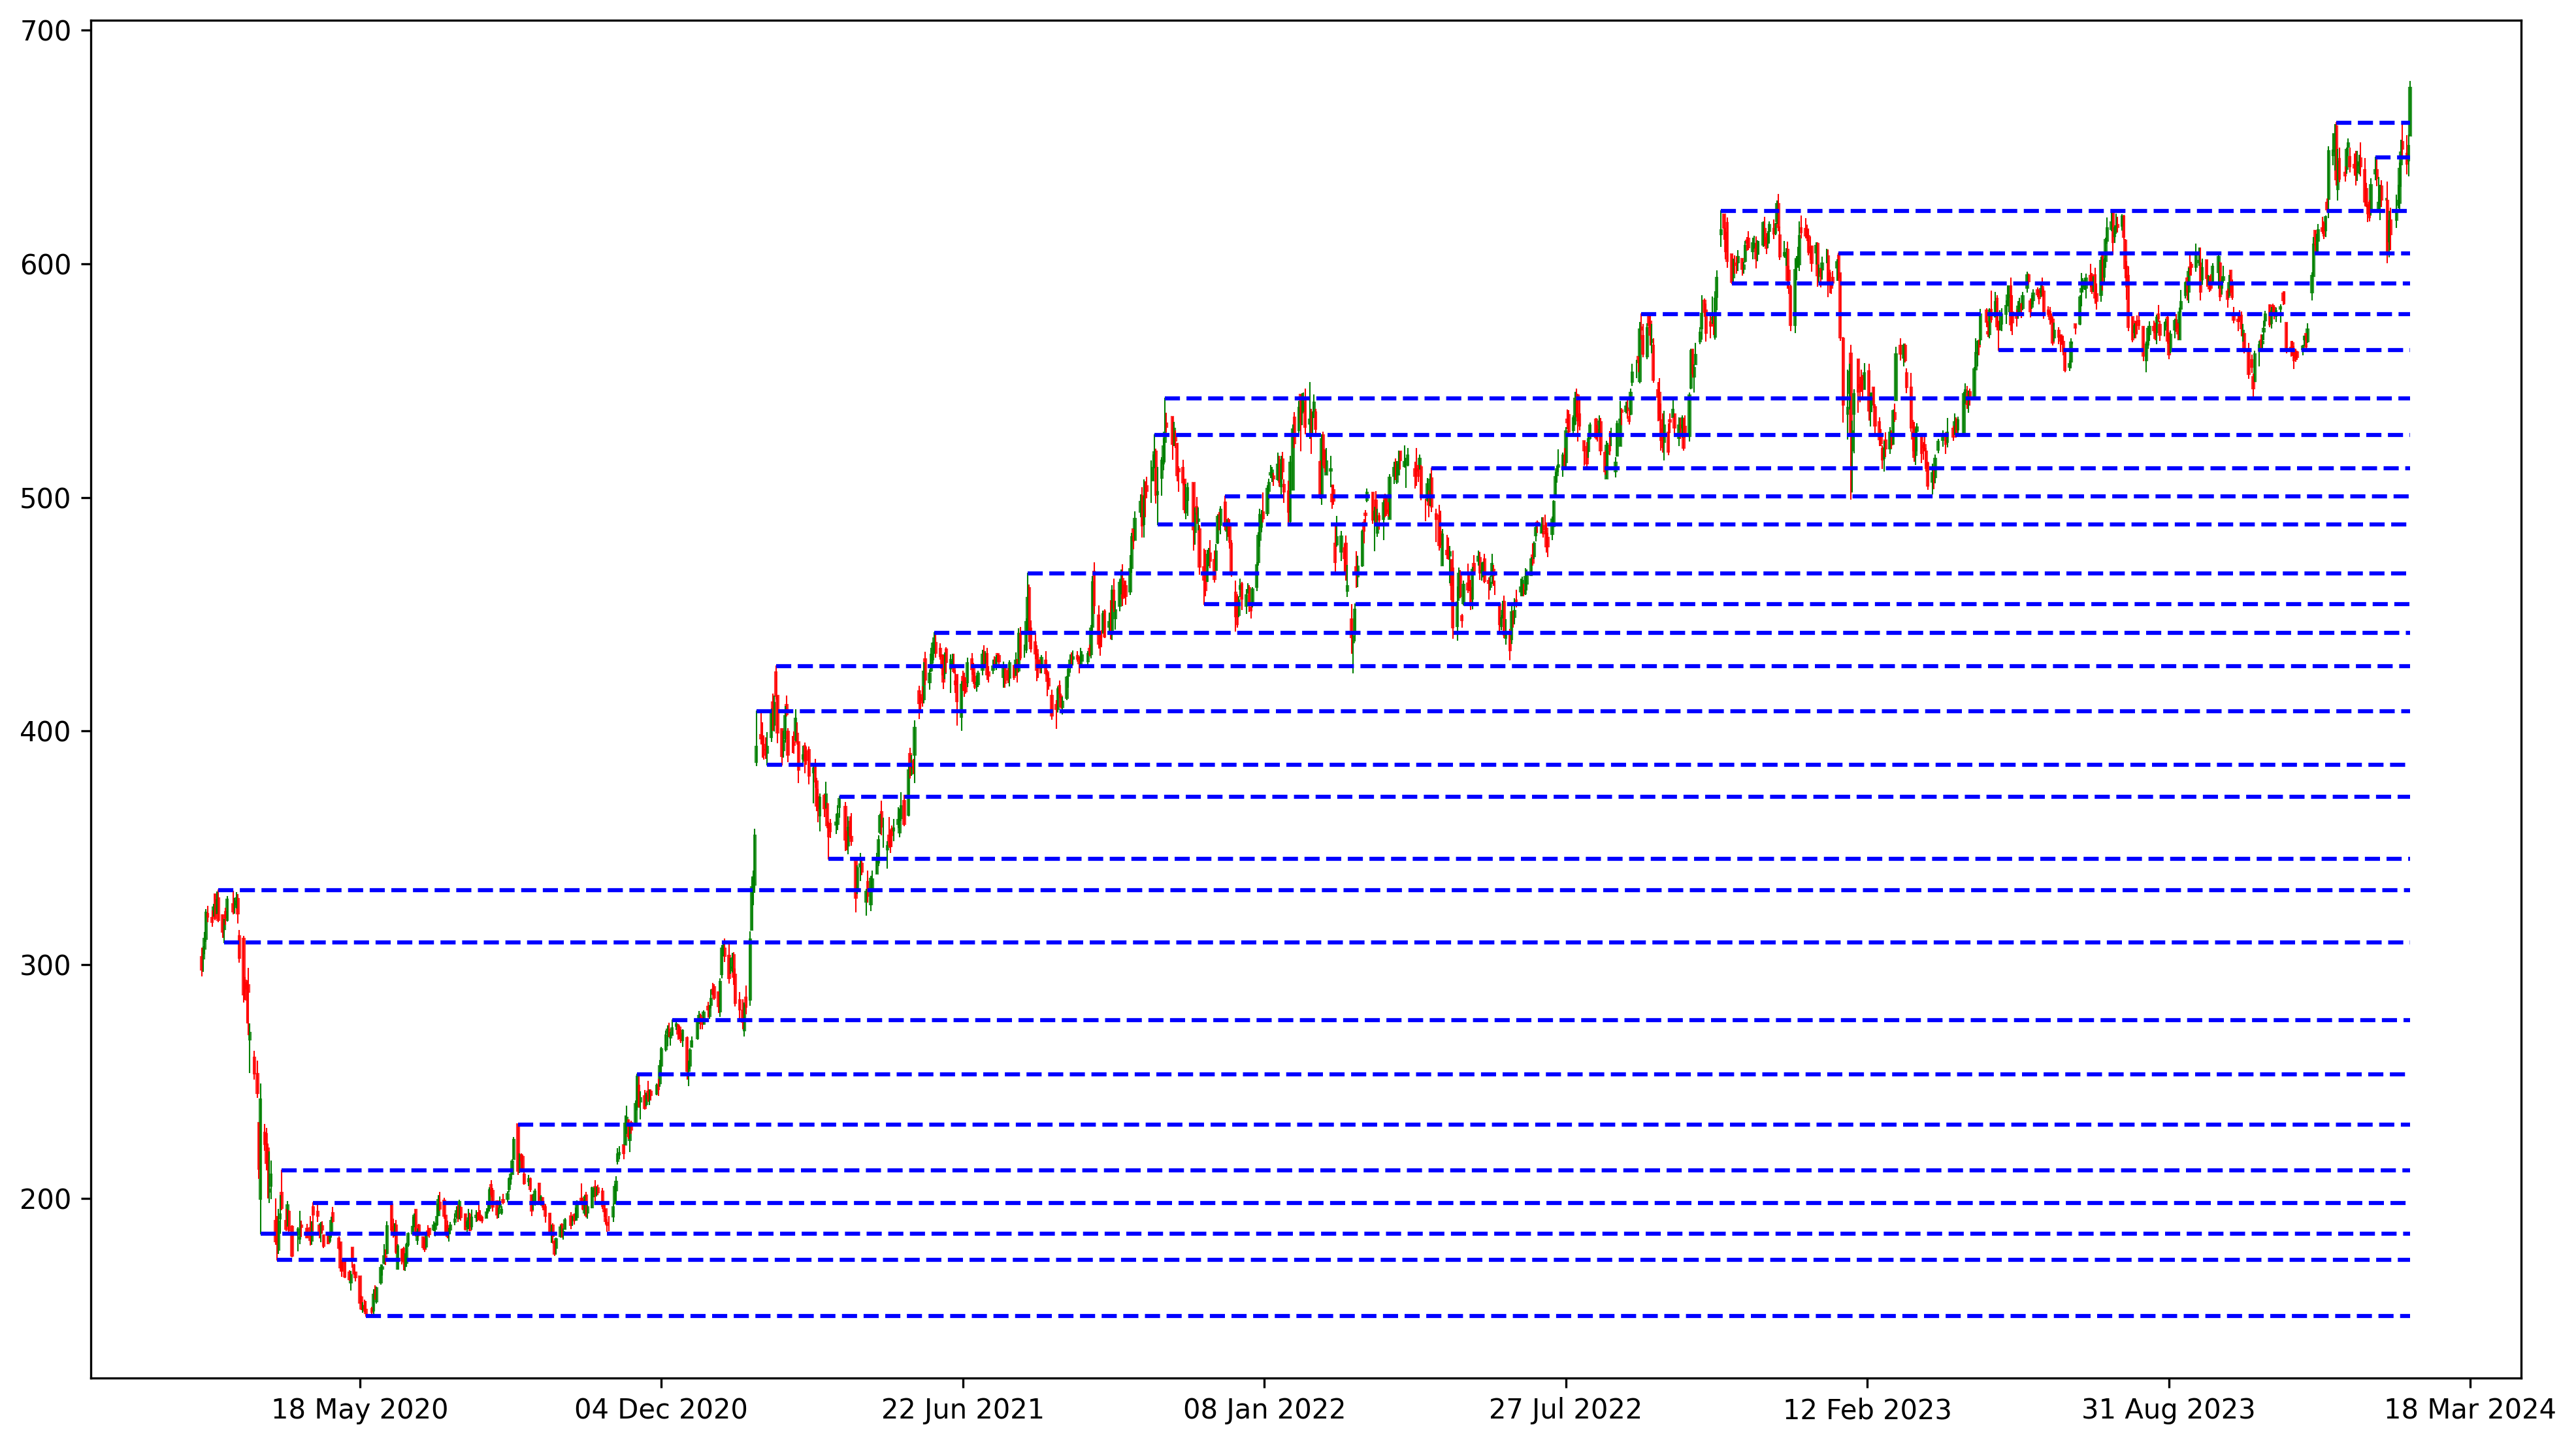

In [13]:

#method 2: window shifting method
symbol = 'SBIN.NS'
df = get_stock_price(symbol)

pivots = []
max_list = []
min_list = []
for i in range(5, len(df)-5):
    high_range = df['High'][i-5:i+4]
    current_max = high_range.max()

    if current_max not in max_list:
        max_list = []
    max_list.append(current_max)
    if len(max_list) == 5 and is_far_from_level(current_max, pivots, df):
        pivots.append((high_range.idxmax(), current_max))
    
    low_range = df['Low'][i-5:i+5]
    current_min = low_range.min()
    if current_min not in min_list:
        min_list = []
    min_list.append(current_min)
    if len(min_list) == 5 and is_far_from_level(current_min, pivots, df):
        pivots.append((low_range.idxmin(), current_min))

plot_all(pivots, df) 

In [7]:
nifty50_symbols = [
    "ADANIPORTS.NS", "ASIANPAINT.NS", "AXISBANK.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS",
    "BAJAJFINSV.NS", "BHARTIARTL.NS", "BRITANNIA.NS", "CIPLA.NS", "COALINDIA.NS",
    "DIVISLAB.NS", "DRREDDY.NS", "EICHERMOT.NS", "GRASIM.NS", "HCLTECH.NS", "HDFC.NS",
    "HDFCBANK.NS", "HEROMOTOCO.NS", "HINDALCO.NS", "HINDUNILVR.NS", "ICICIBANK.NS",
    "IOC.NS", "INDUSINDBK.NS", "INFY.NS", "ITC.NS", "JSWSTEEL.NS", "KOTAKBANK.NS",
    "LT.NS", "M&M.NS", "MARUTI.NS", "NESTLEIND.NS", "NTPC.NS", "ONGC.NS", "POWERGRID.NS",
    "RELIANCE.NS", "SHREECEM.NS", "SBIN.NS", "SBILIFE.NS", "SUNPHARMA.NS", "TCS.NS",
    "TATACONSUM.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "TECHM.NS", "TITAN.NS", "ULTRACEMCO.NS",
    "UBL.NS", "WIPRO.NS"
]

# Replace 'path/to/nifty50_symbols.txt' with the desired path to save the file
file_path = './nifty50_symbols.txt'

# Write NIFTY 50 symbols to the text file
with open(file_path, 'w') as file:
    for symbol in nifty50_symbols:
        file.write(symbol + '\n')

print(f"NIFTY 50 symbols written to: {file_path}")

NIFTY 50 symbols written to: ./nifty50_symbols.txt


In [8]:
# Replace 'path/to/nifty50_symbols.txt' with the actual path to your text file
nifty50_file_path = './nifty50_symbols.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Print the list of NIFTY 50 symbols
#print(nifty50_symbols)

stock_list = nifty50_symbols
print(stock_list)

['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFC.NS', 'HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'IOC.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SHREECEM.NS', 'SBIN.NS', 'SBILIFE.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UBL.NS', 'WIPRO.NS']


In [9]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
stock_list = payload[0]['Symbol'].values.tolist()
print(stock_list)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DH

In [10]:

# screening
def has_breakout(levels, previous, last):
  for _, level in levels:
    cond1 = (previous['Open'] < level) # to make sure previous candle is below the level
    cond2 = (last['Open'] > level) and (last['Low'] > level)
  return (cond1 and cond2)

def detect_level_method_1(df):
  levels = []
  for i in range(2,df.shape[0]-2):
    if is_support(df,i):
      l = df['Low'][i]
      if is_far_from_level(l, levels, df):
        levels.append((i,l))
    elif is_resistance(df,i):
      l = df['High'][i]
      if is_far_from_level(l, levels, df):
        levels.append((i,l))
  return levels

def detect_level_method_2(df):
  levels = []
  max_list = []
  min_list = []
  for i in range(5, len(df)-5):
      high_range = df['High'][i-5:i+4]
      current_max = high_range.max()

      if current_max not in max_list:
          max_list = []
      max_list.append(current_max)
      if len(max_list) == 5 and is_far_from_level(current_max, levels, df):
          levels.append((high_range.idxmax(), current_max))
      
      low_range = df['Low'][i-5:i+5]
      current_min = low_range.min()
      if current_min not in min_list:
          min_list = []
      min_list.append(current_min)
      if len(min_list) == 5 and is_far_from_level(current_min, levels, df):
          levels.append((low_range.idxmin(), current_min))
  return levels

# lists to store the screened results
screened_list_1 = [] 
screened_list_2 = []

# get the full stock list of S&P 500 
#payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
#stock_list = payload[0]['Symbol'].values.tolist()
nifty50_file_path = './formatted_stock_symbols.txt'

# Read NIFTY 50 symbols from the text file into a list
with open(nifty50_file_path, 'r') as file:
    nifty50_symbols = [symbol.strip() for symbol in file.readlines()]

# Print the list of NIFTY 50 symbols
#print(nifty50_symbols)

stock_list = nifty50_symbols


for symbol in stock_list:
  try: 
    df = get_stock_price(symbol)
    
    levels_1 = detect_level_method_1(df)
    if (has_breakout(levels_1[-5:], df.iloc[-2], df.iloc[-1])):
      screened_list_1.append(symbol)

    levels_2 = detect_level_method_2(df)
    if (has_breakout(levels_2[-5:], df.iloc[-2], df.iloc[-1])):
      screened_list_2.append(symbol)

  except Exception as e:
    print(e)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [11]:
screened_list_1


['FINCABLES.NS', 'ZENSARTECH.NS']

In [12]:
screened_list_2

['ELGIEQUIP.NS', 'FINCABLES.NS', 'LATENTVIEW.NS']